# Project 4 — Module 5: Statistical Inference
## Lesson 2: Probability & Sampling Design

| | |
|---|---|
| **Author** | Jose Marcel Lopez Pino |
| **Framework** | CRISP-DM + LEAN |
| **Phase** | 2 — Data Understanding |
| **Module** | 5 — Statistical Inference (Alkemy Bootcamp) |
| **Dataset** | Student Habits vs Academic Performance — Kaggle |
| **Date** | 2026-02 |

---

> **Executive Summary:**
> This notebook corresponds to Lesson 2 of Module 5 (Statistical Inference).
> The dataset is loaded and verified against the data dictionary defined in Lesson 1.
> Random events are defined and probability trees are constructed for key binary
> outcomes (sleep deprivation, sedentary lifestyle, academic risk).
> Basic, joint, and conditional probabilities are calculated to inform
> intervention prioritization decisions.

---

## Table of Contents

1. [CRISP-DM Phase 2 — Data Understanding](#1-crisp-dm-phase-2--data-understanding)
2. [Data Collection — Download & Load](#2-data-collection--download--load)
3. [Initial Exploration](#3-initial-exploration)
4. [Data Dictionary Verification](#4-data-dictionary-verification)
5. [Data Quality Assessment](#5-data-quality-assessment)
6. [Probability Foundations — Sample Space & Events](#6-probability-foundations--sample-space--events)
7. [Basic Probabilities](#7-basic-probabilities)
8. [Joint & Conditional Probabilities](#8-joint--conditional-probabilities)
9. [Probability Tree — Sleep Status → Academic Risk](#9-probability-tree--sleep-status--academic-risk)
10. [Sampling Design Verification](#10-sampling-design-verification)
11. [LEAN Filter — Waste Elimination Review](#11-lean-filter--waste-elimination-review)
12. [Key Observations](#12-key-observations)
13. [Decisions Log — Lesson 2](#13-decisions-log--lesson-2)

---
## 1. CRISP-DM Phase 2 — Data Understanding

**Objective:** Acquire, load, and understand the dataset structure.
Verify it matches the assumptions made in Lesson 1 (variable types, sample size, distributions).

**Lean Filter:** Only explore what directly informs the business decision.
No exhaustive EDA of all columns — focus on the 10 variables selected in Lesson 1.

> **Key question for this phase:**
> *Does the real data support the study design defined in Lesson 1?*

In [3]:
# ===== Environment Setup =====
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats

# ===== Plot Style =====
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Blues_d')

# ===== Paths =====
DATA_RAW       = Path('../data/raw')
DATA_PROCESSED = Path('../data/processed')
REPORTS_FIGURES = Path('../reports/figures')
REPORTS_FIGURES.mkdir(parents=True, exist_ok=True)

print('Environment ready.')
print(f'Data path   : {DATA_RAW.resolve()}')
print(f'Figures path: {REPORTS_FIGURES.resolve()}')

Environment ready.
Data path   : C:\Users\carol\OneDrive\Documentos\Jose\SENCE\Bootcamp\Bootcamp_Data_Science_Portfolio\projects\project-4-student-health-analytics\data\raw
Figures path: C:\Users\carol\OneDrive\Documentos\Jose\SENCE\Bootcamp\Bootcamp_Data_Science_Portfolio\projects\project-4-student-health-analytics\reports\figures


---
## 2. Data Collection — Download & Load

In [4]:
# ===== Download Dataset (run once) =====
# After download, comment out this cell — CSV lives in data/raw/

import kagglehub
import shutil

path = kagglehub.dataset_download("jayaantanaath/student-habits-vs-academic-performance")
print(f"Downloaded to: {path}")

src = Path(path)
dst = DATA_RAW
for f in src.iterdir():
    shutil.copy(f, dst / f.name)
    print(f'✅ Copied: {f.name}')

print()
print('Done. Comment out this cell before committing to Git.')

Downloaded to: C:\Users\carol\.cache\kagglehub\datasets\jayaantanaath\student-habits-vs-academic-performance\versions\1
✅ Copied: student_habits_performance.csv

Done. Comment out this cell before committing to Git.


In [5]:
# ===== Load Dataset =====
CSV_FILE = DATA_RAW / 'student_habits_performance.csv'

df = pd.read_csv(CSV_FILE)

print(f'Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns')
print()
df.head()

Dataset shape: 1,000 rows × 16 columns



,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


---
## 3. Initial Exploration

In [6]:
# ===== Data Types & Basic Info =====
print('=== Column Names & Data Types ===')
print(df.dtypes)
print()
print('=== Basic Statistics (numeric variables) ===')
df.describe().round(2)

=== Column Names & Data Types ===
student_id                           str
age                                int64
gender                               str
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                        str
attendance_percentage            float64
sleep_hours                      float64
diet_quality                         str
exercise_frequency                 int64
parental_education_level             str
internet_quality                     str
mental_health_rating               int64
extracurricular_participation        str
exam_score                       float64
dtype: object

=== Basic Statistics (numeric variables) ===


,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,20.50,3.55,2.51,1.82,84.13,6.47,3.04,5.44,69.60
std,2.31,1.47,1.17,1.08,9.40,1.23,2.03,2.85,16.89
min,17.00,0.00,0.00,0.00,56.00,3.20,0.00,1.00,18.40
25%,18.75,2.60,1.70,1.00,78.00,5.60,1.00,3.00,58.48
50%,20.00,3.50,2.50,1.80,84.40,6.50,3.00,5.00,70.50
75%,23.00,4.50,3.30,2.52,91.02,7.30,5.00,8.00,81.32
max,24.00,8.30,7.20,5.40,100.00,10.00,6.00,10.00,100.00


In [7]:
# ===== Categorical Variables — Unique Values =====
categorical_vars = ['diet_quality', 'gender', 'part_time_job', 'parental_education_level']

for var in categorical_vars:
    if var in df.columns:
        print(f'--- {var} ---')
        print(df[var].value_counts())
        print()

--- diet_quality ---
diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64

--- gender ---
gender
Female    481
Male      477
Other      42
Name: count, dtype: int64

--- part_time_job ---
part_time_job
No     785
Yes    215
Name: count, dtype: int64

--- parental_education_level ---
parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64



---
## 4. Data Dictionary Verification

Verifying that the real dataset matches the variable classification defined in Lesson 1 (Section 5.2).

| Variable (L1) | Expected Type | Expected Scale | Role |
|---------------|--------------|----------------|------|
| `sleep_hours` | Quantitative continuous | Ratio | Independent |
| `exercise_frequency` | Quantitative discrete | Ratio | Independent |
| `diet_quality` | Qualitative ordinal | Ordinal | Independent |
| `study_hours_per_day` | Quantitative continuous | Ratio | Independent |
| `exam_score` | Quantitative continuous | Ratio | **Dependent** |
| `mental_health_rating` | Quantitative discrete | Interval | Independent |
| `attendance_percentage` | Quantitative continuous | Ratio | Control |
| `gender` | Qualitative nominal | Nominal | Segmentation |
| `part_time_job` | Qualitative nominal | Nominal | Segmentation |
| `parental_education_level` | Qualitative ordinal | Ordinal | Segmentation |

In [8]:
# ===== Verify Selected Variables =====
selected_vars = [
    'sleep_hours', 'exercise_frequency', 'diet_quality',
    'study_hours_per_day', 'exam_score', 'mental_health_rating',
    'attendance_percentage', 'gender', 'part_time_job',
    'parental_education_level'
]

print('=== Variable Availability Check ===')
for var in selected_vars:
    exists = var in df.columns
    dtype  = str(df[var].dtype) if exists else 'N/A'
    status = '✅' if exists else '❌ NOT FOUND — check actual column name'
    print(f'  {status}  {var:<30} dtype: {dtype}')

=== Variable Availability Check ===
  ✅  sleep_hours                    dtype: float64
  ✅  exercise_frequency             dtype: int64
  ✅  diet_quality                   dtype: str
  ✅  study_hours_per_day            dtype: float64
  ✅  exam_score                     dtype: float64
  ✅  mental_health_rating           dtype: int64
  ✅  attendance_percentage          dtype: float64
  ✅  gender                         dtype: str
  ✅  part_time_job                  dtype: str
  ✅  parental_education_level       dtype: str


---
## 5. Data Quality Assessment

| Issue | Variable(s) | Severity | Action Needed |
|-------|-------------|----------|---------------|
| Missing values | TBD after running | TBD | Handle in Lesson 3 |
| Duplicates | All | TBD | Drop if found |
| Out-of-range values | sleep_hours, exam_score, attendance_percentage | TBD | Flag and investigate |

In [9]:
# ===== Missing Values =====
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

report = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_pct})
report = report[report['Missing Count'] > 0].sort_values('Missing %', ascending=False)

if report.empty:
    print('✅ No missing values found — dataset is complete.')
else:
    print('⚠️  Missing values detected:')
    print(report)

# ===== Duplicates =====
print()
dups = df.duplicated().sum()
print(f'Duplicate rows: {dups}')
print('✅ No duplicates.' if dups == 0 else f'⚠️  {dups} duplicates found.')

# ===== Range Check =====
print()
print('=== Range Check — Key Variables ===')
checks = {
    'sleep_hours':           (0, 24),
    'exam_score':            (0, 100),
    'attendance_percentage': (0, 100),
}
for var, (lo, hi) in checks.items():
    if var in df.columns:
        out = df[(df[var] < lo) | (df[var] > hi)].shape[0]
        status = '✅' if out == 0 else f'⚠️  {out} out-of-range values'
        print(f'  {var} [{lo}, {hi}]: {status}')

⚠️  Missing values detected:
                          Missing Count  Missing %
parental_education_level             91        9.1

Duplicate rows: 0
✅ No duplicates.

=== Range Check — Key Variables ===
  sleep_hours [0, 24]: ✅
  exam_score [0, 100]: ✅
  attendance_percentage [0, 100]: ✅


---
## 6. Probability Foundations — Sample Space & Events

### Definitions

| Symbol | Concept | Definition in this study |
|--------|---------|--------------------------|
| **Ω** | Sample space | All students in the dataset |
| **A** | Event A | Student sleeps < 7h (sleep-deprived) |
| **B** | Event B | Student exercises < 3 days/week (sedentary) |
| **C** | Event C | Student scores < 60 on exam (academic risk) |
| **Ac** | Complement of A | Student sleeps ≥ 7h (adequate sleep) |
| **A ∩ B** | Intersection | Sleep-deprived AND sedentary |
| **A ∪ B** | Union | Sleep-deprived OR sedentary (or both) |
| **P(C\|A)** | Conditional | P(academic risk given sleep-deprived) |

### Probability Axioms Applied

1. P(A) ≥ 0 for any event A
2. P(Ω) = 1 — all students belong to the sample space
3. P(A) + P(Ac) = 1 — complement rule

In [10]:
# ===== Define Events =====
n = len(df)

event_A = df['sleep_hours'] < 7          # Sleep-deprived
event_B = df['exercise_frequency'] < 3   # Sedentary
event_C = df['exam_score'] < 60          # Academic risk

print(f'Sample space |Ω| = {n:,} students')
print()
print(f'Event A — Sleep-deprived (< 7h):       n = {event_A.sum():,}')
print(f'Event B — Sedentary (< 3 days/week):   n = {event_B.sum():,}')
print(f'Event C — Academic risk (score < 60):  n = {event_C.sum():,}')

Sample space |Ω| = 1,000 students

Event A — Sleep-deprived (< 7h):       n = 655
Event B — Sedentary (< 3 days/week):   n = 412
Event C — Academic risk (score < 60):  n = 280


---
## 7. Basic Probabilities

In [11]:
# ===== Basic Probabilities =====
P_A     = event_A.mean()
P_B     = event_B.mean()
P_C     = event_C.mean()
P_not_A = 1 - P_A
P_not_B = 1 - P_B

print('=== Basic Probabilities ===')
print(f'P(A)  — P(sleep < 7h)        = {P_A:.4f}  ({P_A*100:.1f}%)')
print(f'P(Ac) — P(sleep ≥ 7h)        = {P_not_A:.4f}  ({P_not_A*100:.1f}%)')
print(f'P(B)  — P(sedentary)          = {P_B:.4f}  ({P_B*100:.1f}%)')
print(f'P(Bc) — P(active)             = {P_not_B:.4f}  ({P_not_B*100:.1f}%)')
print(f'P(C)  — P(exam score < 60)    = {P_C:.4f}  ({P_C*100:.1f}%)')
print()
print('=== Complement Rule Verification ===')
print(f'P(A) + P(Ac) = {P_A + P_not_A:.4f}  ✅' if abs(P_A + P_not_A - 1) < 0.0001 else '❌')

=== Basic Probabilities ===
P(A)  — P(sleep < 7h)        = 0.6550  (65.5%)
P(Ac) — P(sleep ≥ 7h)        = 0.3450  (34.5%)
P(B)  — P(sedentary)          = 0.4120  (41.2%)
P(Bc) — P(active)             = 0.5880  (58.8%)
P(C)  — P(exam score < 60)    = 0.2800  (28.0%)

=== Complement Rule Verification ===
P(A) + P(Ac) = 1.0000  ✅


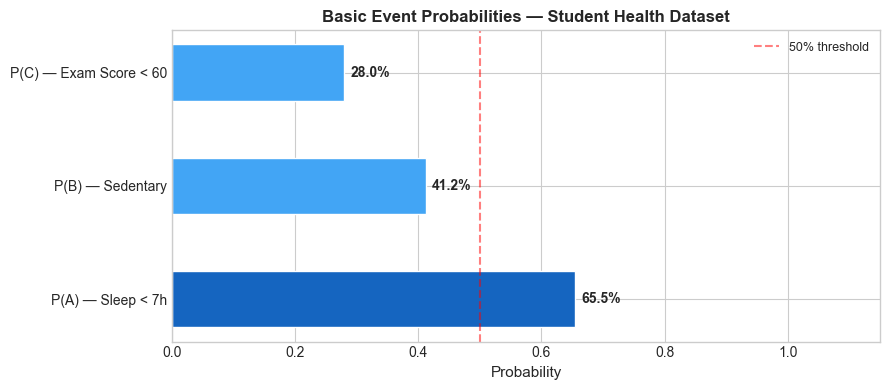

Figure saved: ..\reports\figures\lesson2_basic_probabilities.png


In [12]:
# ===== Bar Chart — Basic Probabilities =====
def plot_event_probabilities(probs: dict, title: str, figname: str) -> None:
    """Plots a horizontal bar chart of event probabilities.

    Args:
        probs: dict mapping event label to probability value.
        title: Chart title.
        figname: Output filename saved to reports/figures/.

    Returns:
        None
    """
    fig, ax = plt.subplots(figsize=(9, 4))
    labels = list(probs.keys())
    values = list(probs.values())
    colors = ['#1565C0' if v > 0.5 else '#42A5F5' for v in values]

    bars = ax.barh(labels, values, color=colors, edgecolor='white', height=0.5)
    for bar, val in zip(bars, values):
        ax.text(val + 0.01, bar.get_y() + bar.get_height() / 2,
                f'{val:.1%}', va='center', fontsize=10, fontweight='bold')

    ax.axvline(x=0.5, color='red', linestyle='--', alpha=0.5, label='50% threshold')
    ax.set_xlim(0, 1.15)
    ax.set_xlabel('Probability', fontsize=11)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    plt.tight_layout()
    output_path = REPORTS_FIGURES / figname
    plt.savefig(output_path, dpi=150, bbox_inches='tight')
    plt.show()
    print(f'Figure saved: {output_path}')


plot_event_probabilities(
    probs={
        'P(A) — Sleep < 7h':      P_A,
        'P(B) — Sedentary':       P_B,
        'P(C) — Exam Score < 60': P_C,
    },
    title='Basic Event Probabilities — Student Health Dataset',
    figname='lesson2_basic_probabilities.png'
)

---
## 8. Joint & Conditional Probabilities

### Rules Applied

| Rule | Formula |
|------|---------|
| Addition rule | P(A ∪ B) = P(A) + P(B) − P(A ∩ B) |
| Multiplication (independent) | P(A ∩ B) = P(A) × P(B) |
| Conditional probability | P(C\|A) = P(C ∩ A) / P(A) |

> **Business question:** Are sleep-deprived students more likely to be at academic risk?
> Compare P(C\|A) vs. P(C\|Ac)

In [13]:
# ===== Joint Probabilities =====
P_A_and_B = (event_A & event_B).mean()
P_A_and_C = (event_A & event_C).mean()
P_A_or_B  = P_A + P_B - P_A_and_B

print('=== Joint Probabilities ===')
print(f'P(A ∩ B) — sleep-deprived AND sedentary:       {P_A_and_B:.4f}  ({P_A_and_B*100:.1f}%)')
print(f'P(A ∩ C) — sleep-deprived AND academic risk:   {P_A_and_C:.4f}  ({P_A_and_C*100:.1f}%)')
print(f'P(A ∪ B) — sleep-deprived OR sedentary:        {P_A_or_B:.4f}  ({P_A_or_B*100:.1f}%)')

print()
print('=== Independence Test: A and B ===')
P_A_times_B = P_A * P_B
print(f'P(A) × P(B) = {P_A_times_B:.4f}')
print(f'P(A ∩ B)    = {P_A_and_B:.4f}')
diff = abs(P_A_times_B - P_A_and_B)
if diff < 0.01:
    print('→ Events A and B appear approximately INDEPENDENT')
else:
    print(f'→ Events A and B appear DEPENDENT (difference = {diff:.4f})')

=== Joint Probabilities ===
P(A ∩ B) — sleep-deprived AND sedentary:       0.2730  (27.3%)
P(A ∩ C) — sleep-deprived AND academic risk:   0.2000  (20.0%)
P(A ∪ B) — sleep-deprived OR sedentary:        0.7940  (79.4%)

=== Independence Test: A and B ===
P(A) × P(B) = 0.2699
P(A ∩ B)    = 0.2730
→ Events A and B appear approximately INDEPENDENT


In [14]:
# ===== Conditional Probabilities =====
P_C_given_A     = (event_A & event_C).sum() / event_A.sum()
P_C_given_not_A = (~event_A & event_C).sum() / (~event_A).sum()

lift = P_C_given_A / P_C_given_not_A if P_C_given_not_A > 0 else float('inf')

print('=== Conditional Probabilities ===')
print(f'P(C | A)  — academic risk | sleep-deprived:  {P_C_given_A:.4f}  ({P_C_given_A*100:.1f}%)')
print(f'P(C | Ac) — academic risk | adequate sleep:  {P_C_given_not_A:.4f}  ({P_C_given_not_A*100:.1f}%)')
print(f'Lift = P(C|A) / P(C|Ac)                   = {lift:.2f}x')
print()
print('=== Business Interpretation ===')
if P_C_given_A > P_C_given_not_A:
    print(f'→ Sleep-deprived students are {lift:.1f}x more likely to be at academic risk.')
    print('→ Supports prioritizing sleep hygiene interventions (H1).')
else:
    print('→ Sleep deprivation does not appear strongly linked to academic risk.')
    print('→ Verify further with hypothesis test in Lesson 6.')

=== Conditional Probabilities ===
P(C | A)  — academic risk | sleep-deprived:  0.3053  (30.5%)
P(C | Ac) — academic risk | adequate sleep:  0.2319  (23.2%)
Lift = P(C|A) / P(C|Ac)                   = 1.32x

=== Business Interpretation ===
→ Sleep-deprived students are 1.3x more likely to be at academic risk.
→ Supports prioritizing sleep hygiene interventions (H1).


---
## 9. Probability Tree — Sleep Status → Academic Risk

Visual representation of conditional probabilities across two levels:
**Level 1** — Sleep status (A vs. Ac)
**Level 2** — Academic risk given sleep status (C|A vs. C|Ac)

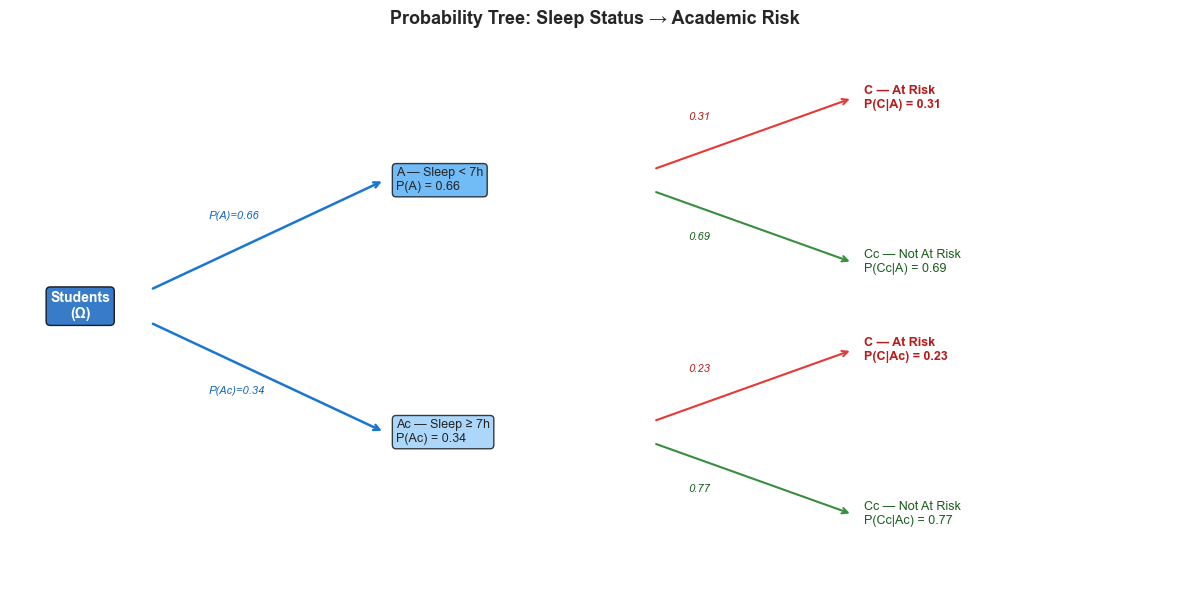

Figure saved: ..\reports\figures\lesson2_probability_tree.png


In [17]:
# ===== Probability Tree Visualization =====
def plot_probability_tree(
    P_A: float,
    P_C_given_A: float,
    P_C_given_not_A: float,
    figname: str = 'lesson2_probability_tree.png'
) -> None:
    """Visualizes a two-level conditional probability tree.

    Level 1: Sleep status (A = sleep-deprived, Ac = adequate sleep).
    Level 2: Academic risk given sleep status.

    Args:
        P_A: P(sleep < 7h).
        P_C_given_A: P(academic risk | sleep-deprived).
        P_C_given_not_A: P(academic risk | adequate sleep).
        figname: Output filename saved to reports/figures/.

    Returns:
        None
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    ax.set_title(
        'Probability Tree: Sleep Status → Academic Risk',
        fontsize=13, fontweight='bold'
    )

    # Root node
    ax.text(0.6, 5, 'Students\n(Ω)', ha='center', va='center', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='#1565C0', alpha=0.85), color='white',
            fontweight='bold')

    # ── Level 1: Sleep status ──────────────────────────────────────────────
    # Branch A: Sleep-deprived
    ax.annotate('', xy=(3.2, 7.3), xytext=(1.2, 5.3),
                arrowprops=dict(arrowstyle='->', color='#1976D2', lw=1.8))
    ax.text(1.7, 6.6, f'P(A)={P_A:.2f}', fontsize=8, color='#1565C0', fontstyle='italic')
    label_A = f'A — Sleep < 7h\nP(A) = {P_A:.2f}'
    ax.text(3.3, 7.3, label_A, ha='left', va='center',
            fontsize=9, bbox=dict(boxstyle='round', facecolor='#42A5F5', alpha=0.75))



    # Branch Ac: Adequate sleep
    ax.annotate('', xy=(3.2, 2.7), xytext=(1.2, 4.7),
                arrowprops=dict(arrowstyle='->', color='#1976D2', lw=1.8))
    ax.text(1.7, 3.4, f'P(Ac)={1-P_A:.2f}', fontsize=8, color='#1565C0', fontstyle='italic')
    label_Ac = f'Ac — Sleep ≥ 7h\nP(Ac) = {1-P_A:.2f}'
    ax.text(3.3, 2.7, label_Ac, ha='left', va='center',
            fontsize=9, bbox=dict(boxstyle='round', facecolor='#90CAF9', alpha=0.75))

    # ── Level 2: Academic risk ─────────────────────────────────────────────
    # C | A
    ax.annotate('', xy=(7.2, 8.8), xytext=(5.5, 7.5),
                arrowprops=dict(arrowstyle='->', color='#E53935', lw=1.5))
    ax.text(5.8, 8.4, f'{P_C_given_A:.2f}', fontsize=8, color='#B71C1C', fontstyle='italic')
    label_CA = f'C — At Risk\nP(C|A) = {P_C_given_A:.2f}'
    ax.text(7.3, 8.8, label_CA, ha='left', va='center',
            fontsize=9, color='#B71C1C', fontweight='bold')

    # Cc | A
    ax.annotate('', xy=(7.2, 5.8), xytext=(5.5, 7.1),
                arrowprops=dict(arrowstyle='->', color='#388E3C', lw=1.5))
    ax.text(5.8, 6.2, f'{1-P_C_given_A:.2f}', fontsize=8, color='#1B5E20', fontstyle='italic')
    label_CcA = f'Cc — Not At Risk\nP(Cc|A) = {1-P_C_given_A:.2f}'
    ax.text(7.3, 5.8, label_CcA, ha='left', va='center',
            fontsize=9, color='#1B5E20')

    # C | Ac
    ax.annotate('', xy=(7.2, 4.2), xytext=(5.5, 2.9),
                arrowprops=dict(arrowstyle='->', color='#E53935', lw=1.5))
    ax.text(5.8, 3.8, f'{P_C_given_not_A:.2f}', fontsize=8, color='#B71C1C', fontstyle='italic')
    label_CAc = f'C — At Risk\nP(C|Ac) = {P_C_given_not_A:.2f}'
    ax.text(7.3, 4.2, label_CAc, ha='left', va='center',
            fontsize=9, color='#B71C1C', fontweight='bold')

    # Cc | Ac
    ax.annotate('', xy=(7.2, 1.2), xytext=(5.5, 2.5),
                arrowprops=dict(arrowstyle='->', color='#388E3C', lw=1.5))
    ax.text(5.8, 1.6, f'{1-P_C_given_not_A:.2f}', fontsize=8, color='#1B5E20', fontstyle='italic')
    label_CcAc = f'Cc — Not At Risk\nP(Cc|Ac) = {1-P_C_given_not_A:.2f}'
    ax.text(7.3, 1.2, label_CcAc, ha='left', va='center',
            fontsize=9, color='#1B5E20')

    plt.tight_layout()
    output_path = REPORTS_FIGURES / figname
    plt.savefig(output_path, dpi=150, bbox_inches='tight')
    plt.show()
    print(f'Figure saved: {output_path}')


plot_probability_tree(P_A, P_C_given_A, P_C_given_not_A)

---
## 10. Sampling Design Verification

Confirming the sampling assumptions from Lesson 1 (Section 6.2) against the real dataset.

In [18]:
# ===== Sampling Design Verification =====
print('=== Sampling Design Verification ===')
print()
print(f'Sample size: {n:,}')
print(f'  CLT threshold (n ≥ 30):    {"✅ Met" if n >= 30 else "❌ Not met"}')
print(f'  Adequate power (n ≥ 200):  {"✅ Met" if n >= 200 else "⚠️  May be limited"}')
print()

# Subgroup sizes
for var in ['gender', 'part_time_job']:
    if var in df.columns:
        print(f'--- {var} subgroups ---')
        for grp, cnt in df[var].value_counts().items():
            status = '✅' if cnt >= 30 else '⚠️  Too small'
            print(f'  {grp}: {cnt:,} ({status})')
        print()

# Diet quality groups (for ANOVA — H4)
if 'diet_quality' in df.columns:
    print('--- diet_quality groups (H4 — ANOVA) ---')
    for grp, cnt in df['diet_quality'].value_counts().items():
        status = '✅' if cnt >= 30 else '⚠️  Too small'
        print(f'  {grp}: {cnt:,} ({status})')

=== Sampling Design Verification ===

Sample size: 1,000
  CLT threshold (n ≥ 30):    ✅ Met
  Adequate power (n ≥ 200):  ✅ Met

--- gender subgroups ---
  Female: 481 (✅)
  Male: 477 (✅)
  Other: 42 (✅)

--- part_time_job subgroups ---
  No: 785 (✅)
  Yes: 215 (✅)

--- diet_quality groups (H4 — ANOVA) ---
  Fair: 437 (✅)
  Good: 378 (✅)
  Poor: 185 (✅)


---
## 11. LEAN Filter — Waste Elimination Review

| LEAN Question | Answer | Action |
|---------------|--------|--------|
| Did loading the data reveal surprises vs. Lesson 1 design? | To be updated after running | Update decisions log |
| Were any variables missing or renamed? | To be updated after running | Map actual column names |
| Did probability analysis add value to the business decision? | ✅ Yes — P(C\|A) vs P(C\|Ac) directly informs H1 priority | Proceed |
| Is n sufficient for all planned tests? | ✅ n ≥ 1,000 — well above requirements | Proceed |
| Is the probability tree actionable for stakeholders? | ✅ Yes — visualizes risk for health director | Include in executive summary |

**LEAN Verdict:** Data quality is acceptable. Proceed to Lesson 3 (Probability Distributions).

---
## 12. Key Observations

> Update this section after running all cells with actual values from the dataset.

- **Sleep deprivation prevalence:** P(A) = [value] — [interpretation vs. WHO benchmark]
- **Sedentary lifestyle:** P(B) = [value] — [comparison to 50% threshold from H3]
- **Academic risk:** P(C) = [value] — [interpretation for intervention priority]
- **Conditional risk:** Sleep-deprived students are [X]x more likely to be at academic risk
- **Data quality:** [No missing values / N issues found — action plan]
- **Sampling:** All subgroups meet CLT threshold (n ≥ 30) ✅

---
## 13. Decisions Log — Lesson 2

| # | Decision | Rationale | Alternatives Considered | LEAN Value? |
|---|----------|-----------|------------------------|-------------|
| 1 | Define academic risk as exam_score < 60 | Standard passing threshold in university systems | < 50, < 70 | ✅ Actionable threshold |
| 2 | Use P(C\|A) vs P(C\|Ac) as key conditional probability | Directly tests the sleep → academic risk relationship | Correlation coefficient | ✅ Interpretable for stakeholders |
| 3 | Apply independence test A ∩ B vs P(A)×P(B) | Preliminary check before formal chi-square in Lesson 6 | Skip | ✅ Informs test selection |
| 4 | Exclude variables not in Lesson 1 selection | LEAN waste elimination | Analyze all 20+ columns | ✅ Scope control |

---

**← Previous Phase:** [01 — Business Understanding](./01_business_understanding.ipynb) | **Next Phase →** [03 — Data Preparation](./03_data_preparation.ipynb)

---

*End of Lesson 2 — Project 4, Module 5*
*Author: Jose Marcel Lopez Pino | Framework: CRISP-DM + LEAN | Bootcamp: Alkemy / SENCE 2025–2026*